# CASE DA NETFLIX

### Análise exploratória de um dataset do catálogo de novembro de 2019 da Netflix para o projeto final do trainee da Neuron Ds&Ai

Desenvolvido por:

- Anna Virgínia
- Arthur Spalding
- Letícia Sartor
- Luiz Henrique Alves

# Montando e Limpando o DataSet

Primeiramente, temos que importar nosso dataset para um dataframe com o intuito de tratar os dados.

In [1]:
# Importando as bibliotecas que iremos usar no projeto
import pandas as pd # Pandas
import matplotlib.pyplot as plt # Matplotlib
import seaborn as sns # Seaborn
import numpy as np # Numpy
import re # Regex

# Transformando o arquivo csv "netflix_titles_nov_2019" em um dataframe
netflix_nov_df = pd.read_csv('netflix_titles_nov_2019.csv')
netflix_nov_df

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show
...,...,...,...,...,...,...,...,...,...,...,...,...
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie
5835,70157452,Dinner for Five,NaN,NaN,United States,"February 4, 2008",2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show


Após isso, temos que modificar o dataframe para extrair as informações que queremos.

No dataset do catálogo de novembro de 2019 da netflix iremos realizar as seguintes mudanças:
- Retirar a coluna de descrição, pois não iremos utilizá-la
- Mudar o index do dataframe
- Preencher os valores faltando com 'not informed'
- Separar os diretores quando os títulos possuem mais de um
- Separar os participantes do elenco
- Separar os países quando os títulos possuem mais de um
- Formatar a data que o título foi adicionado
- Separar séries e filmes com a sua devida duração
- Separar os gêneros quando os títulos possuem mais de um
- Transformar os dados qualitativos em quantitativos para fazer a correlação

### Mudando o index, retirando algumas colunas e preenchendo valores faltando

In [2]:
# Mudando o id de cada linha para os show_id já contidos no dataset
netflix_nov_df.index = netflix_nov_df['show_id']

# Retirando as colunas "show_id", pois já é o índice,
# e a descrição, pois não agrega em nada na nossa análise
netflix_nov_df.drop(columns=['show_id', 'description'], inplace = True)
netflix_nov_df.head()

,title,director,cast,country,date_added,release_year,rating,duration,listed_in,type
show_id,,,,,,,,,,
81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",TV Show
81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies",Movie
81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",Movie
81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies",Movie
80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,TV Show


In [3]:
# Preenchendo os valores "Nan" com "not informed" para serem contabilizados na análise
netflix_nov_df.fillna('not informed', inplace = True)
netflix_nov_df

,title,director,cast,country,date_added,release_year,rating,duration,listed_in,type
show_id,,,,,,,,,,
81193313,Chocolate,not informed,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",TV Show
81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,not informed,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies",Movie
81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",Movie
81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies",Movie
80213643,Chip and Potato,not informed,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",not informed,2019,TV-Y,2 Seasons,Kids' TV,TV Show
...,...,...,...,...,...,...,...,...,...,...
70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,NR,84 min,"Cult Movies, Horror Movies",Movie
70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-14,29 min,Horror Movies,Movie
70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,NR,104 min,"Dramas, International Movies",Movie


### Separando os dados

A ideia principal para separar os dados é a de criar um dicionário para armazenar o id do título e uma lista com os dados separados. Esses dados estão em uma string e dividos por vírgulas, utilizando a função rsplit conseguimos separar e colocar em uma lista

#### Diretores

In [4]:
netflix_nov_df.head()

,title,director,cast,country,date_added,release_year,rating,duration,listed_in,type
show_id,,,,,,,,,,
81193313,Chocolate,not informed,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",TV Show
81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,not informed,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies",Movie
81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",Movie
81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies",Movie
80213643,Chip and Potato,not informed,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",not informed,2019,TV-Y,2 Seasons,Kids' TV,TV Show


In [5]:
directors = dict()

for id in netflix_nov_df.index:
    directors[id] = (netflix_nov_df.loc[netflix_nov_df.index == id, 'director'][id]).rsplit(', ')
    
directors


{81193313: ['not informed'],
 81197050: ['Luis Ara', 'Ignacio Jaunsolo'],
 81213894: ['Abhishek Sharma'],
 81082007: ['Mati Diop'],
 80213643: ['not informed'],
 81172754: ['Moses Inwang'],
 81120982: ['Jérémy Clapin'],
 81227195: ['Mandla Dube'],
 70205672: ['not informed'],
 81172841: ['Mike Ezuruonye'],
 81172899: ['Cheta Chukwu'],
 81094391: ['not informed'],
 81172908: ['Roger Russell'],
 81152641: ['not informed'],
 81172901: ['Toka McBaror'],
 80990849: ['not informed'],
 81033086: ['Leslie Small'],
 80156799: ['not informed'],
 81161538: ['not informed'],
 80997965: ['not informed'],
 81018979: ['not informed'],
 60020826: ['Frank Oz'],
 81002391: ['not informed'],
 70101696: ['Edward Zwick'],
 81194544: ['Basava Shankar Eeday'],
 80995081: ['Prakash Satam'],
 81177504: ['Elle-Máijá Tailfeathers', 'Kathleen Hepburn'],
 80175798: ['Martin Scorsese'],
 81062293: ['Seth Barrish'],
 80235524: ['Steve Ball'],
 81204911: ['not informed'],
 81035121: ['not informed'],
 81140259: ['not

Após a separação iremos contabilizar quantas vezes cada valor aparece no dataframe

In [6]:
list_indexs = []
dict_directors = dict()

for id in directors:
    list_indexs.append(id)
    for name in directors[id]:
        if name in dict_directors:
            dict_directors[name] += 1
        else:
            dict_directors[name] = 1

dict_directors


{'not informed': 1901,
 'Luis Ara': 4,
 'Ignacio Jaunsolo': 1,
 'Abhishek Sharma': 3,
 'Mati Diop': 1,
 'Moses Inwang': 1,
 'Jérémy Clapin': 1,
 'Mandla Dube': 1,
 'Mike Ezuruonye': 1,
 'Cheta Chukwu': 1,
 'Roger Russell': 1,
 'Toka McBaror': 2,
 'Leslie Small': 6,
 'Frank Oz': 2,
 'Edward Zwick': 1,
 'Basava Shankar Eeday': 1,
 'Prakash Satam': 4,
 'Elle-Máijá Tailfeathers': 1,
 'Kathleen Hepburn': 1,
 'Martin Scorsese': 8,
 'Seth Barrish': 2,
 'Steve Ball': 3,
 'Sanjiv Jaiswal': 1,
 'Marta Jaenes': 1,
 'Rosa Márquez': 1,
 'Aleksandr Chernyaev': 1,
 'Fedor Lyass': 1,
 'Robert Altman': 2,
 'Ric Roman Waugh': 1,
 'Charles A. Nichols': 1,
 'Iwao Takamoto': 1,
 'David Ayer': 3,
 'John Irvin': 1,
 'Simon Wells': 3,
 'Julien Abraham': 1,
 'Tsutomu Mizushima': 1,
 'Nate Adams': 2,
 'Adam Carolla': 2,
 'Kathryn Bigelow': 1,
 'Monika Mitchell': 1,
 'Anne Fontaine': 2,
 'Joshua Caldwell': 1,
 'Mike Judge': 1,
 'Bruce W. Smith': 1,
 'Eva Orner': 1,
 'Craig Brewer': 2,
 'Àlex Pastor': 1,
 'David 

Feita a contabilização, iremos criar um dataframe com o resultado e ordená-lo para realizar uma análise

In [7]:
directors_df = pd.DataFrame.from_dict(dict_directors, orient='index', columns=['appers'])
directors_df

,appers
not informed,1901
Luis Ara,4
Ignacio Jaunsolo,1
Abhishek Sharma,3
Mati Diop,1
...,...
Robert C. Ramirez,1
Icíar Bollaín,1
Jim Monaco,1
Ole Bornedal,1


In [8]:
directors_df['appers'].sort_values(ascending = False)

not informed            1901
Jan Suter                 21
Raúl Campos               19
Marcus Raboy              14
Jay Karas                 14
                        ... 
Brittany Andrews           1
Tim Blake Nelson           1
André Øvredal              1
Álvaro Brechner            1
Sorin Dan Mihalcescu       1
Name: appers, Length: 3449, dtype: int64

In [9]:
# Procurando se X diretor aparece nos títulos do catálogo e quantas vezes
directors_df.loc[directors_df.index == 'Seth Barrish']

,appers
Seth Barrish,2


Repetiremos o mesmo para os outros dados que precisam ser separados

#### Elenco


In [10]:
cast = dict()

for id in netflix_nov_df.index:
    cast[id] = (netflix_nov_df.loc[netflix_nov_df.index == id, 'cast'][id]).rsplit(', ')
    
cast

{81193313: ['Ha Ji-won',
  'Yoon Kye-sang',
  'Jang Seung-jo',
  'Kang Bu-ja',
  'Lee Jae-ryong',
  'Min Jin-woong',
  'Kim Won-hae',
  'Yoo Teo'],
 81197050: ['Christian Morales'],
 81213894: ['Sonam Kapoor',
  'Dulquer Salmaan',
  'Sanjay Kapoor',
  'Sikander Kher',
  'Angad Bedi',
  'Koel Purie',
  'Pooja Bhamrah',
  'Manu Rishi Chadha'],
 81082007: ['Mama Sane',
  'Amadou Mbow',
  'Ibrahima Traore',
  'Nicole Sougou',
  'Amina Kane',
  'Mariama Gassama',
  'Coumba Dieng',
  'Ibrahima Mbaye',
  'Diankou Sembene'],
 80213643: ['Abigail Oliver',
  'Andrea Libman',
  'Briana Buckmaster',
  'Brian Dobson',
  'Chance Hurstfield',
  'Dominic Good',
  'Emma Jayne Maas',
  'Evan Byarushengo',
  'Scotia Anderson',
  'Alessandro Juliani'],
 81172754: ['Ramsey Nouah',
  'Chigul',
  'Sola Sobowale',
  'Ireti Doyle',
  'Ben Touitou',
  'Francis Onwochei',
  'Ememobong Nkana',
  'Emem Inwang',
  'Patrick Onyeke'],
 81120982: ['Hakim Faris',
  'Victoire Du Bois',
  "Patrick d'Assumçao",
  'Dev Pat

In [11]:
dict_cast = dict()

for id in cast:
    for name in cast[id]:
        if name in dict_cast:
            dict_cast[name] += 1
        else:
            dict_cast[name] = 1

dict_cast

{'Ha Ji-won': 1,
 'Yoon Kye-sang': 1,
 'Jang Seung-jo': 1,
 'Kang Bu-ja': 1,
 'Lee Jae-ryong': 1,
 'Min Jin-woong': 1,
 'Kim Won-hae': 4,
 'Yoo Teo': 1,
 'Christian Morales': 1,
 'Sonam Kapoor': 9,
 'Dulquer Salmaan': 3,
 'Sanjay Kapoor': 6,
 'Sikander Kher': 3,
 'Angad Bedi': 4,
 'Koel Purie': 1,
 'Pooja Bhamrah': 1,
 'Manu Rishi Chadha': 5,
 'Mama Sane': 1,
 'Amadou Mbow': 1,
 'Ibrahima Traore': 1,
 'Nicole Sougou': 1,
 'Amina Kane': 1,
 'Mariama Gassama': 1,
 'Coumba Dieng': 1,
 'Ibrahima Mbaye': 1,
 'Diankou Sembene': 1,
 'Abigail Oliver': 1,
 'Andrea Libman': 22,
 'Briana Buckmaster': 1,
 'Brian Dobson': 5,
 'Chance Hurstfield': 1,
 'Dominic Good': 1,
 'Emma Jayne Maas': 1,
 'Evan Byarushengo': 1,
 'Scotia Anderson': 1,
 'Alessandro Juliani': 14,
 'Ramsey Nouah': 4,
 'Chigul': 1,
 'Sola Sobowale': 4,
 'Ireti Doyle': 3,
 'Ben Touitou': 1,
 'Francis Onwochei': 1,
 'Ememobong Nkana': 1,
 'Emem Inwang': 1,
 'Patrick Onyeke': 1,
 'Hakim Faris': 1,
 'Victoire Du Bois': 2,
 "Patrick d'As

In [12]:
cast_df = pd.DataFrame.from_dict(dict_cast, orient='index', columns=['appers'])
cast_df

,appers
Ha Ji-won,1
Yoon Kye-sang,1
Jang Seung-jo,1
Kang Bu-ja,1
Lee Jae-ryong,1
...,...
Shaana Diya,1
John Krisiukenas,1
Yoriko Haraguchi,1
David Crane,1


In [13]:
cast_df['appers'].sort_values(ascending = False)

not informed           556
Anupam Kher             29
Shah Rukh Khan          28
Akshay Kumar            23
Takahiro Sakurai        22
                      ... 
Alexandre Schreiber      1
Julia Kouakou            1
Margaux Bonin            1
Mathias Minne            1
Chad Thomas              1
Name: appers, Length: 26026, dtype: int64

In [14]:
# Procurando se X ator aparece nos títulos do catálogo e quantas vezes
cast_df.loc[cast_df.index == 'Adam Scott']

,appers
Adam Scott,10


#### Países compostos

In [15]:
netflix_nov_df['country']

show_id
81193313                 South Korea
81197050                not informed
81213894                       India
81082007    France, Senegal, Belgium
80213643      Canada, United Kingdom
                      ...           
70141644               United States
70127998               United States
70084180                     Denmark
70157452               United States
70053412               United States
Name: country, Length: 5837, dtype: object

In [16]:
countrys = dict()

for id in netflix_nov_df.index:
    countrys[id] = (netflix_nov_df.loc[netflix_nov_df.index == id, 'country'][id]).rsplit(', ')
    
countrys

{81193313: ['South Korea'],
 81197050: ['not informed'],
 81213894: ['India'],
 81082007: ['France', 'Senegal', 'Belgium'],
 80213643: ['Canada', 'United Kingdom'],
 81172754: ['Nigeria'],
 81120982: ['France'],
 81227195: ['South Africa'],
 70205672: ['United States', 'Spain', 'Colombia', 'Mexico'],
 81172841: ['not informed'],
 81172899: ['Nigeria'],
 81094391: ['United States'],
 81172908: ['Nigeria'],
 81152641: ['not informed'],
 81172901: ['Nigeria'],
 80990849: ['United States'],
 81033086: ['United States'],
 80156799: ['Japan'],
 81161538: ['Brazil'],
 80997965: ['United States'],
 81018979: ['France'],
 60020826: ['Germany', 'Canada', 'United States'],
 81002391: ['United States'],
 70101696: ['United States'],
 81194544: ['India'],
 80995081: ['not informed'],
 81177504: ['Canada', 'Norway'],
 80175798: ['United States'],
 81062293: ['United States'],
 80235524: ['United States'],
 81204911: ['Poland'],
 81035121: ['not informed'],
 81140259: ['Mexico'],
 80241855: ['United 

In [17]:
dict_countrys = dict()

for id in countrys:
    for country in countrys[id]:
        if country in dict_countrys:
            dict_countrys[country] += 1
        else:
            dict_countrys[country] = 1

dict_countrys

{'South Korea': 155,
 'not informed': 427,
 'India': 753,
 'France': 255,
 'Senegal': 2,
 'Belgium': 63,
 'Canada': 300,
 'United Kingdom': 558,
 'Nigeria': 26,
 'South Africa': 26,
 'United States': 2420,
 'Spain': 173,
 'Colombia': 36,
 'Mexico': 122,
 'Japan': 216,
 'Brazil': 63,
 'Germany': 135,
 'Norway': 20,
 'Poland': 24,
 'China': 117,
 'United Arab Emirates': 21,
 'Singapore': 29,
 'Australia': 121,
 'Italy': 63,
 'New Zealand': 21,
 'Argentina': 66,
 'Taiwan': 73,
 'Finland': 8,
 'Chile': 23,
 'Peru': 9,
 'Ireland': 33,
 'Thailand': 56,
 'Turkey': 86,
 'Hong Kong': 96,
 'Liechtenstein': 1,
 'Israel': 25,
 'Switzerland': 15,
 'Russia': 21,
 'Malaysia': 20,
 'Luxembourg': 7,
 'Egypt': 53,
 'Austria': 9,
 'Netherlands': 36,
 'Indonesia': 50,
 'Czech Republic': 15,
 'Denmark': 37,
 'Poland,': 1,
 'West Germany': 4,
 'Malta': 2,
 'Vietnam': 4,
 'Pakistan': 23,
 'Portugal': 4,
 'Sweden': 32,
 'Philippines': 46,
 'Lebanon': 9,
 'Bulgaria': 7,
 'Dominican Republic': 2,
 'Jordan': 6,


In [18]:
countrys_df = pd.DataFrame.from_dict(dict_countrys, orient='index', columns=['productions'])
countrys_df

,productions
South Korea,155
not informed,427
India,753
France,255
Senegal,2
...,...
Kazakhstan,1
Montenegro,1
"United Kingdom,",1
Bermuda,1


In [19]:
countrys_df['productions'].sort_values(ascending = False)

United States     2420
India              753
United Kingdom     558
not informed       427
Canada             300
                  ... 
Guatemala            1
Somalia              1
Kenya                1
Sudan                1
Ecuador              1
Name: productions, Length: 112, dtype: int64

Com esses dados podemos realizar um top 5 com os países que mais possuem títulos no catálogo, considerando produções compostas

In [20]:
# Desconsiderando os dados que estão faltando da contabilização
countrys_df.drop('not informed', inplace= True)
countrys_df['productions'].sort_values(ascending = False)

United States     2420
India              753
United Kingdom     558
Canada             300
France             255
                  ... 
Guatemala            1
Somalia              1
Kenya                1
Sudan                1
Ecuador              1
Name: productions, Length: 111, dtype: int64

In [21]:
graph_country_all = countrys_df['productions'].sort_values(ascending = False)[0:5]

<AxesSubplot: title={'center': 'Top 5 países com o maior número de títulos no catálogo (Contando as produções compostas)'}, xlabel='Países', ylabel='Quantidade de Títulos'>

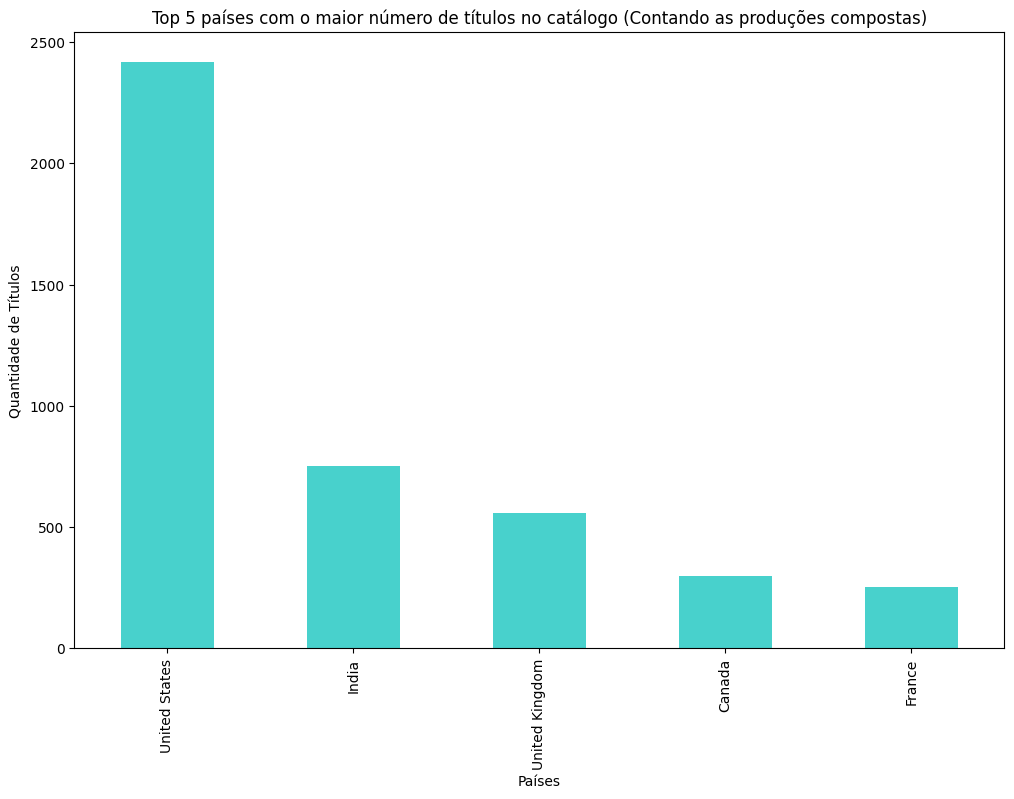

In [22]:
# Plotando o gráfico
graph_country_all.plot(kind = 'bar', title='Top 5 países com o maior número de títulos no catálogo (Contando as produções compostas)', xlabel = 'Países', ylabel='Quantidade de Títulos', color = 'mediumturquoise', figsize=(12,8))

#### Gêneros dos títulos

In [23]:
netflix_nov_df.rename(columns={"listed_in": "genre"}, inplace=True)
netflix_nov_df.head()

,title,director,cast,country,date_added,release_year,rating,duration,genre,type
show_id,,,,,,,,,,
81193313,Chocolate,not informed,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",TV Show
81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,not informed,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies",Movie
81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",Movie
81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies",Movie
80213643,Chip and Potato,not informed,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",not informed,2019,TV-Y,2 Seasons,Kids' TV,TV Show


In [24]:
netflix_nov_df['genre']

show_id
81193313    International TV Shows, Korean TV Shows, Roman...
81197050                  Documentaries, International Movies
81213894               Comedies, Dramas, International Movies
81082007     Dramas, Independent Movies, International Movies
80213643                                             Kids' TV
                                  ...                        
70141644                           Cult Movies, Horror Movies
70127998                                        Horror Movies
70084180                         Dramas, International Movies
70157452                         Stand-Up Comedy & Talk Shows
70053412                Dramas, Independent Movies, Thrillers
Name: genre, Length: 5837, dtype: object

In [25]:
genres = dict()

for id in netflix_nov_df.index:
    genres[id] = (netflix_nov_df.loc[netflix_nov_df.index == id, 'genre'][id]).rsplit(', ')
    
genres

{81193313: ['International TV Shows', 'Korean TV Shows', 'Romantic TV Shows'],
 81197050: ['Documentaries', 'International Movies'],
 81213894: ['Comedies', 'Dramas', 'International Movies'],
 81082007: ['Dramas', 'Independent Movies', 'International Movies'],
 80213643: ["Kids' TV"],
 81172754: ['Comedies', 'International Movies', 'Thrillers'],
 81120982: ['Dramas', 'Independent Movies', 'International Movies'],
 81227195: ['Dramas', 'International Movies'],
 70205672: ['Crime TV Shows',
  'International TV Shows',
  'Spanish-Language TV Shows'],
 81172841: ['Comedies', 'International Movies'],
 81172899: ['Comedies', 'Independent Movies', 'International Movies'],
 81094391: ['Reality TV'],
 81172908: ['Action & Adventure', 'Comedies', 'International Movies'],
 81152641: ['International TV Shows', 'Romantic TV Shows', 'TV Comedies'],
 81172901: ['Dramas', 'International Movies', 'Thrillers'],
 80990849: ['Docuseries'],
 81033086: ['Children & Family Movies', 'Dramas'],
 80156799: ['An

In [26]:
dict_genres = dict()

for id in genres:
    for genre in genres[id]:
        if genre in dict_genres:
            dict_genres[genre] += 1
        else:
            dict_genres[genre] = 1

dict_genres

{'International TV Shows': 966,
 'Korean TV Shows': 120,
 'Romantic TV Shows': 265,
 'Documentaries': 658,
 'International Movies': 1797,
 'Comedies': 992,
 'Dramas': 1488,
 'Independent Movies': 516,
 "Kids' TV": 313,
 'Thrillers': 353,
 'Crime TV Shows': 355,
 'Spanish-Language TV Shows': 114,
 'Reality TV': 146,
 'Action & Adventure': 532,
 'TV Comedies': 425,
 'Docuseries': 271,
 'Children & Family Movies': 340,
 'Anime Series': 111,
 'Stand-Up Comedy & Talk Shows': 42,
 'TV Dramas': 574,
 'Romantic Movies': 338,
 'Stand-Up Comedy': 273,
 'Movies': 55,
 'TV Mysteries': 66,
 'Classic Movies': 65,
 'TV Sci-Fi & Fantasy': 66,
 'Sci-Fi & Fantasy': 165,
 'Anime Features': 41,
 'Sports Movies': 149,
 'TV Action & Adventure': 122,
 'Cult Movies': 42,
 'Horror Movies': 229,
 'Teen TV Shows': 41,
 'British TV Shows': 205,
 'Music & Musicals': 229,
 'LGBTQ Movies': 59,
 'Science & Nature TV': 66,
 'Faith & Spirituality': 46,
 'TV Horror': 51,
 'TV Thrillers': 43,
 'Classic & Cult TV': 24,
 '

In [27]:
genres_df = pd.DataFrame.from_dict(dict_genres, orient='index', columns=['quantity'])
genres_df

,quantity
International TV Shows,966
Korean TV Shows,120
Romantic TV Shows,265
Documentaries,658
International Movies,1797
Comedies,992
Dramas,1488
Independent Movies,516
Kids' TV,313
Thrillers,353


In [28]:
# Essa coluna não possui nenhum valor faltando
genres_df['quantity'].sort_values(ascending = False)

International Movies            1797
Dramas                          1488
Comedies                         992
International TV Shows           966
Documentaries                    658
TV Dramas                        574
Action & Adventure               532
Independent Movies               516
TV Comedies                      425
Crime TV Shows                   355
Thrillers                        353
Children & Family Movies         340
Romantic Movies                  338
Kids' TV                         313
Stand-Up Comedy                  273
Docuseries                       271
Romantic TV Shows                265
Music & Musicals                 229
Horror Movies                    229
British TV Shows                 205
Sci-Fi & Fantasy                 165
Sports Movies                    149
Reality TV                       146
TV Action & Adventure            122
Korean TV Shows                  120
Spanish-Language TV Shows        114
Anime Series                     111
T

Da mesma forma que nos países, podemos montar um histograma com os gêneros mais presentes no catálogo

In [29]:
graph_genres = genres_df['quantity'].sort_values(ascending = False)

<AxesSubplot: title={'center': 'Gêneros que mais aparecem no catálogo'}, xlabel='Gêneros', ylabel='Quantidade de Títulos'>

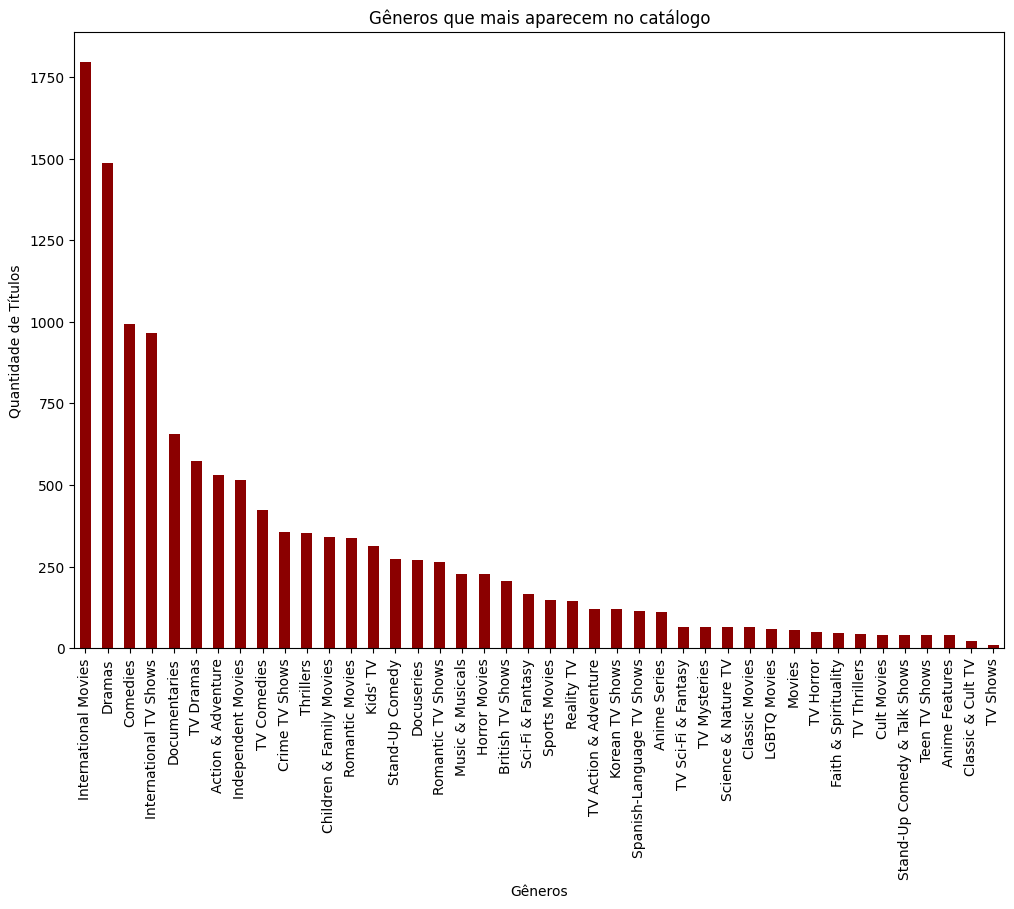

In [30]:
# Plotando o gráfico
graph_genres.plot(kind = 'bar', title='Gêneros que mais aparecem no catálogo', xlabel = 'Gêneros', ylabel='Quantidade de Títulos', color = 'darkred', figsize=(12,8))

Podemos relacionar também o gênero com a data de lançamento dos títulos para ver a tendência ao longo do tempo

In [31]:
# Relacionando os dados de gênero por ano de lançamento para criar 
# o gráfico
genres_date = dict()

for id in netflix_nov_df.index:
    genres_date[(netflix_nov_df.loc[netflix_nov_df.index == id, 'release_year'][id])] = (netflix_nov_df.loc[netflix_nov_df.index == id, 'genre'][id]).rsplit(', ')
    
genres_date

{2019: ['TV Comedies'],
 2018: ['TV Dramas', 'TV Mysteries', 'TV Sci-Fi & Fantasy'],
 2016: ['Crime TV Shows', 'International TV Shows', 'TV Dramas'],
 2017: ['International TV Shows', 'TV Dramas'],
 2001: ['British TV Shows', 'Docuseries', 'International TV Shows'],
 2008: ["Kids' TV", 'TV Action & Adventure', 'TV Comedies'],
 2015: ['Stand-Up Comedy'],
 1980: ['Dramas'],
 1973: ['Action & Adventure', 'International Movies'],
 2012: ['Comedies'],
 1987: ['Cult Movies', 'Horror Movies'],
 2002: ["Kids' TV"],
 2013: ['Crime TV Shows', 'TV Dramas', 'TV Thrillers'],
 1996: ["Kids' TV"],
 1992: ['British TV Shows', "Kids' TV", 'TV Comedies'],
 2007: ['Stand-Up Comedy & Talk Shows'],
 2009: ['Horror Movies'],
 1995: ["Kids' TV"],
 2014: ['Documentaries'],
 1968: ['Classic & Cult TV', 'TV Action & Adventure', 'TV Sci-Fi & Fantasy'],
 2010: ['Dramas', 'International Movies'],
 1999: ["Kids' TV"],
 2011: ['Documentaries'],
 2000: ['Children & Family Movies', 'Dramas', 'Faith & Spirituality'],


### Montar o gráfico*

### Transformando os dados qualitativos em quantitativos

Para realizar a correlação entre os dados temos que transformá-los em quantitativos (números). Essa transformação pode ser através da atribuição de valores próprios para dados conhecidos ou pela função cat.codes que atribui pesos de forma automática para os dados

#### Classificação dos títulos

Para a transformação utilizaremos valores pré-determinados para cada classificação de modo a dar o mesmo peso para aquelas que são iguais

In [32]:
# Verificando todas as classificações presentes no dataset
rating_list = []

for rating in netflix_nov_df['rating']:
    if rating not in rating_list:
        rating_list.append(rating)

print(rating_list)

['TV-14', 'TV-G', 'TV-Y', 'TV-MA', 'TV-PG', 'R', 'TV-Y7', 'PG', 'G', 'PG-13', 'TV-Y7-FV', 'NR', 'UR', 'NC-17', 'not informed']


In [33]:
# Determinando os pesos e aplicando no dataset

dict_rating = {'TV-G':0, # Livre para todos os públicos
               'G':0, # Livre para todos os públicos
               'TV-Y': 5, # Conteúdo Infantil
               'TV-Y7':7, # Não recomendado para menores de 7 anos
               'TV-Y7-FV':8, # Não recomendado para menores de 7 anos (Violência Fantasiosa)
               'TV-PG': 10, # Necessita acompanhamento dos pais
               'PG': 10, # Necessita acompanhamento dos pais
               'PG-13': 14, # Não recomendado para menores de 14 anos
               'TV-14':14, # Não recomendado para menores de 14 anos
               'R': 14, # Não recomendado para menores de 14 anos
               'TV-MA':17, # Não recomendado para menores de 17 anos
               'NC-17':17, # Não recomendado para menores de 17 anos
                # NR E UR - Não foi submetido ao órgão responsável para ser analisado
               'NR':-1, 
               'UR':-1,
               'not informed':-1,

}

netflix_nov_df['rating'] = netflix_nov_df['rating'].map(dict_rating)
netflix_nov_df

,title,director,cast,country,date_added,release_year,rating,duration,genre,type
show_id,,,,,,,,,,
81193313,Chocolate,not informed,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,14,1 Season,"International TV Shows, Korean TV Shows, Roman...",TV Show
81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,not informed,"November 30, 2019",2019,0,67 min,"Documentaries, International Movies",Movie
81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,14,135 min,"Comedies, Dramas, International Movies",Movie
81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,14,106 min,"Dramas, Independent Movies, International Movies",Movie
80213643,Chip and Potato,not informed,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",not informed,2019,5,2 Seasons,Kids' TV,TV Show
...,...,...,...,...,...,...,...,...,...,...
70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,-1,84 min,"Cult Movies, Horror Movies",Movie
70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,14,29 min,Horror Movies,Movie
70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,-1,104 min,"Dramas, International Movies",Movie


#### Tipo dos Títulos

Para o tipo também utilizaremos valores pré-determinados

In [34]:
# Verificando todos os tipos presentes no dataset
type_list = []

for type_item in netflix_nov_df['type']:
    if type_item not in type_list:
        type_list.append(type_item)

print(type_list)

['TV Show', 'Movie']


In [35]:
dict_type = {'TV Show':0, # Série de TV
               'Movie':1, # Filme
            }

netflix_nov_df['type'] = netflix_nov_df['type'].map(dict_type)
netflix_nov_df

,title,director,cast,country,date_added,release_year,rating,duration,genre,type
show_id,,,,,,,,,,
81193313,Chocolate,not informed,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,14,1 Season,"International TV Shows, Korean TV Shows, Roman...",0
81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,not informed,"November 30, 2019",2019,0,67 min,"Documentaries, International Movies",1
81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,14,135 min,"Comedies, Dramas, International Movies",1
81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,14,106 min,"Dramas, Independent Movies, International Movies",1
80213643,Chip and Potato,not informed,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",not informed,2019,5,2 Seasons,Kids' TV,0
...,...,...,...,...,...,...,...,...,...,...
70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,-1,84 min,"Cult Movies, Horror Movies",1
70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,14,29 min,Horror Movies,1
70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,-1,104 min,"Dramas, International Movies",1


In [36]:
# Filme = 1
# Série de TV = 0
graph_type = netflix_nov_df['type'].value_counts()
graph_type

1    3939
0    1898
Name: type, dtype: int64

Com os dados que tratamos é possível agora montar gráficos relacionando datas e quantidade para cada tipo

In [37]:
# Relacionando os dados do tipo de título por ano de lançamento para criar 
# o gráfico
movies_df = netflix_nov_df.loc[netflix_nov_df['type'] == 1, ['release_year']]
graph_movies = movies_df['release_year'].value_counts().sort_index()

series_df = netflix_nov_df.loc[netflix_nov_df['type'] == 0, ['release_year']]
graph_series = series_df['release_year'].value_counts().sort_index()

# Juntando as séries resultantes e transformando em um dataset para criar o gráfico
type_per_year = {'Filmes': graph_movies, 'Séries de TV': graph_series}
type_per_year_df = pd.DataFrame(type_per_year)
# Preenchendo os valores "Nan" com 0
graph_type_per_year = type_per_year_df.fillna(0)

graph_type_per_year

,Filmes,Séries de TV
1925,0.0,1.0
1942,2.0,0.0
1943,3.0,0.0
1944,3.0,0.0
1945,3.0,0.0
...,...,...
2016,584.0,234.0
2017,655.0,273.0
2018,630.0,410.0
2019,347.0,415.0


<AxesSubplot: title={'center': 'Lançamentos ao longo do tempo'}, xlabel='Ano', ylabel='Quantidade de Lançamentos'>

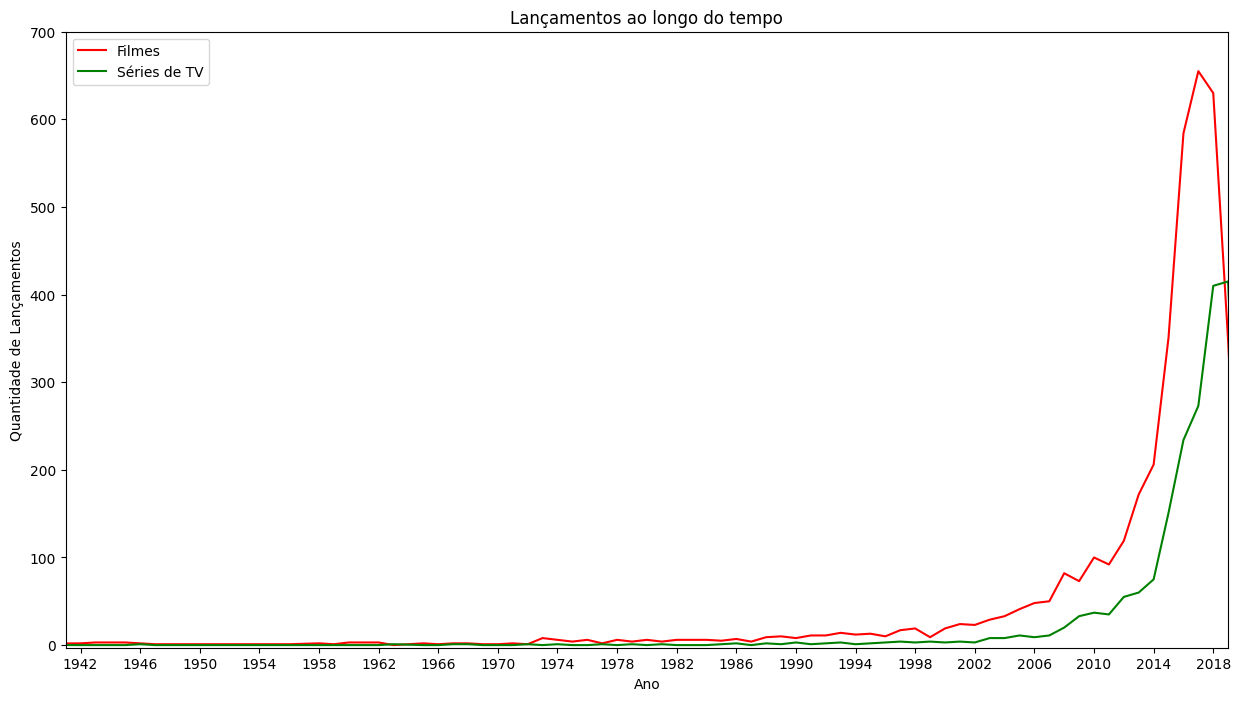

In [38]:
# Plotando o gráfico
graph_type_per_year.plot(kind = 'line' ,title = 'Lançamentos ao longo do tempo', xlabel = 'Ano', ylabel = 'Quantidade de Lançamentos', figsize=(15,8),  xticks = range(1942, 2020, 4), ylim = (-3, 700), xlim = (1941, 2019), color = ['red', 'green'])

#### Data de adição

Para a transformação da data iremos formatá-la para o tipo datetime seguindo o padrão "aaaammdd"

In [39]:
netflix_nov_df['date_added']

show_id
81193313    November 30, 2019
81197050    November 30, 2019
81213894    November 30, 2019
81082007    November 29, 2019
80213643         not informed
                  ...        
70141644     November 1, 2010
70127998    November 18, 2009
70084180          May 5, 2009
70157452     February 4, 2008
70053412      January 1, 2008
Name: date_added, Length: 5837, dtype: object

In [40]:
# Trocando o valor 'not informed' para 'None' com o intuito de não dar erro na função
netflix_nov_df['date_added'].loc[netflix_nov_df['date_added'] == 'not informed'] = None 
netflix_nov_df['date_added']

C:\Users\luiz\AppData\Local\Temp\ipykernel_9900\2206971532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_nov_df['date_added'].loc[netflix_nov_df['date_added'] == 'not informed'] = None


show_id
81193313    November 30, 2019
81197050    November 30, 2019
81213894    November 30, 2019
81082007    November 29, 2019
80213643                 None
                  ...        
70141644     November 1, 2010
70127998    November 18, 2009
70084180          May 5, 2009
70157452     February 4, 2008
70053412      January 1, 2008
Name: date_added, Length: 5837, dtype: object

In [41]:
# Transformando a data
netflix_nov_df['date_added'] = pd.to_datetime(netflix_nov_df['date_added'], format='%B %d, %Y')
netflix_nov_df['date_added']

show_id
81193313   2019-11-30
81197050   2019-11-30
81213894   2019-11-30
81082007   2019-11-29
80213643          NaT
              ...    
70141644   2010-11-01
70127998   2009-11-18
70084180   2009-05-05
70157452   2008-02-04
70053412   2008-01-01
Name: date_added, Length: 5837, dtype: datetime64[ns]

#### Data de adição em função do tipo

Podemos plotar um gráfico da data de adição para cada tipo de título

In [42]:
netflix_nov_date_df = netflix_nov_df.copy()

In [43]:
# Contando os valores para cada data
netflix_nov_date_df['date_added'].value_counts()

2019-11-01    94
2018-03-01    78
2018-10-01    72
2019-10-01    71
2019-07-01    60
              ..
2018-10-28     1
2017-05-04     1
2017-05-07     1
2017-05-08     1
2008-01-01     1
Name: date_added, Length: 1092, dtype: int64

In [44]:
# Relacionando os dados do tipo de título por ano de adição para criar 
# o gráfico
movies_date_df = netflix_nov_date_df.loc[netflix_nov_date_df['type'] == 1, ['date_added']]
graph_movies_date = movies_date_df['date_added'].value_counts()

series_date_df = netflix_nov_date_df.loc[netflix_nov_date_df['type'] == 0, ['date_added']]
graph_series_date = series_date_df['date_added'].value_counts()

# Juntando as séries resultantes e transformando em um dataset para criar o gráfico)
type_per_date = {'Filmes': graph_movies_date, 'Séries de TV': graph_series_date}
type_per_date_df = pd.DataFrame(type_per_date)
# Preenchendo os valores "Nan" com 0
graph_type_per_date = type_per_date_df.fillna(0)

graph_type_per_date

,Filmes,Séries de TV
2008-01-01,1.0,0.0
2008-02-04,0.0,1.0
2009-05-05,1.0,0.0
2009-11-18,1.0,0.0
2010-11-01,1.0,0.0
...,...,...
2019-11-26,3.0,1.0
2019-11-27,5.0,1.0
2019-11-28,2.0,4.0
2019-11-29,8.0,3.0


<AxesSubplot: title={'center': 'Títulos adicionados ao longo do tempo'}, xlabel='Ano', ylabel='Quantidade de Adições'>

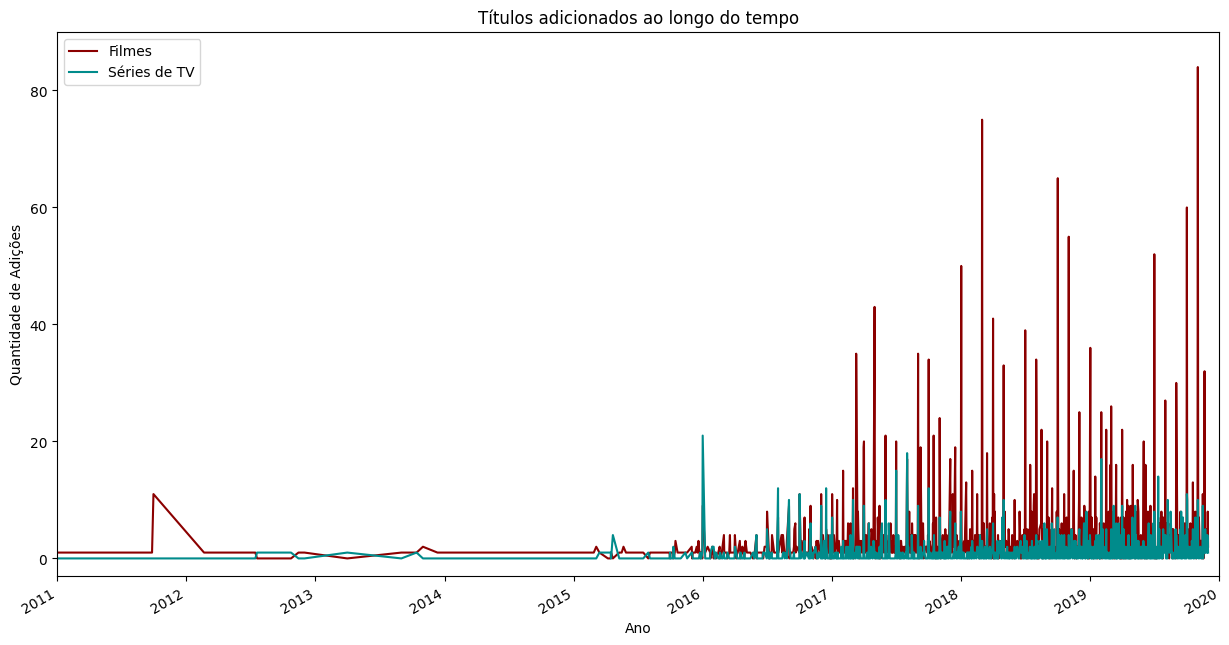

In [45]:
# Plotando o gráfico
graph_type_per_date.plot(kind = 'line' ,title = 'Títulos adicionados ao longo do tempo', xlabel = 'Ano', ylabel = 'Quantidade de Adições', figsize=(15,8), ylim = (-3, 90), xlim = ('2011-01-01', '2020-01-01'), color = ['darkred', 'darkcyan'])

Podemos realizar o mesmo, mas para os dois tipos somados

In [46]:
# Contabilizando as adições para cada data
graph_per_date = netflix_nov_date_df['date_added'].value_counts()

<AxesSubplot: title={'center': 'Títulos adicionados ao longo do tempo'}, xlabel='Ano', ylabel='Quantidade de Adições'>

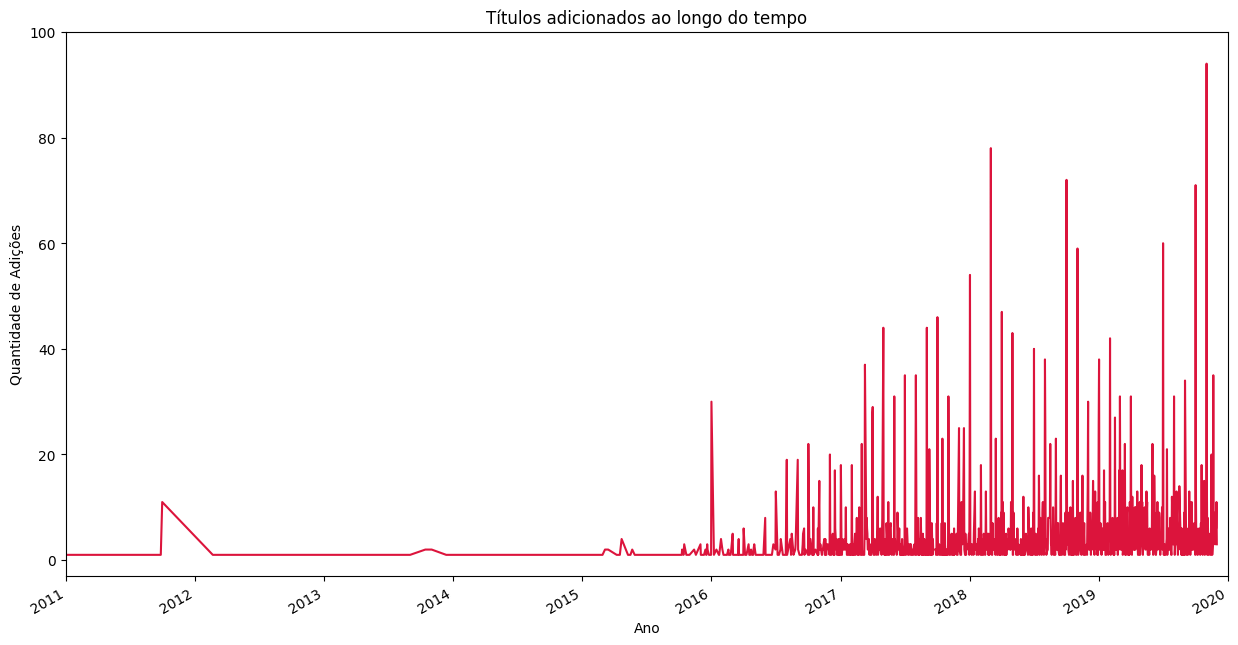

In [47]:
# Plotando o gráfico
graph_per_date.plot(kind='line' ,title = 'Títulos adicionados ao longo do tempo', xlabel = 'Ano', ylabel = 'Quantidade de Adições', figsize=(15,8), ylim = (-3, 100), xlim = ('2011-01-01', '2020-01-01'), color ='crimson')

#### Data de Lançamento

Podemos criar um gráfico com a data de lançamento dos títulos e relacioná-la com os países de produção

In [48]:
# Países escolhidos
# - Estados Unidos
# - India
# - Brasil
# - Reino Unido

# Selecionando do dataset apenas as linhas de determinado país
united_states_df = netflix_nov_df.loc[netflix_nov_df['country'] == 'United States', ['release_year']]
# Realizando a contagem de lançamentos a cada ano
graph_united_states = united_states_df['release_year'].value_counts().sort_index()

# Repetição
india_df = netflix_nov_df.loc[netflix_nov_df['country'] == 'India', ['release_year']]
graph_india = india_df['release_year'].value_counts().sort_index()

brazil_df = netflix_nov_df.loc[netflix_nov_df['country'] == 'Brazil', ['release_year']]
graph_brazil = brazil_df['release_year'].value_counts().sort_index()

united_kingdom_df = netflix_nov_df.loc[netflix_nov_df['country'] == 'United Kingdom', ['release_year']]
graph_united_kingdom = united_kingdom_df['release_year'].value_counts().sort_index()

# Juntando as séries resultantes e transformando em um dataset para criar o gráfico
titles_per_year = {'United States': graph_united_states, 'India': graph_india, 'Brazil': graph_brazil, 'United Kingdom': graph_united_kingdom}
titles_per_year_df = pd.DataFrame(titles_per_year)
# Preenchendo os valores "Nan" com 0
graph_titles_per_year = titles_per_year_df.fillna(0)

graph_titles_per_year

,United States,India,Brazil,United Kingdom
1942,2.0,0.0,0.0,0.0
1943,3.0,0.0,0.0,0.0
1944,2.0,0.0,0.0,0.0
1945,3.0,0.0,0.0,0.0
1946,3.0,0.0,0.0,0.0
...,...,...,...,...
2015,129.0,60.0,3.0,36.0
2016,236.0,66.0,5.0,61.0
2017,333.0,96.0,8.0,67.0
2018,353.0,88.0,13.0,56.0


<AxesSubplot: title={'center': 'Lançamento de títulos ao longo do tempo'}, xlabel='Ano', ylabel='Quantidade de Lançamentos'>

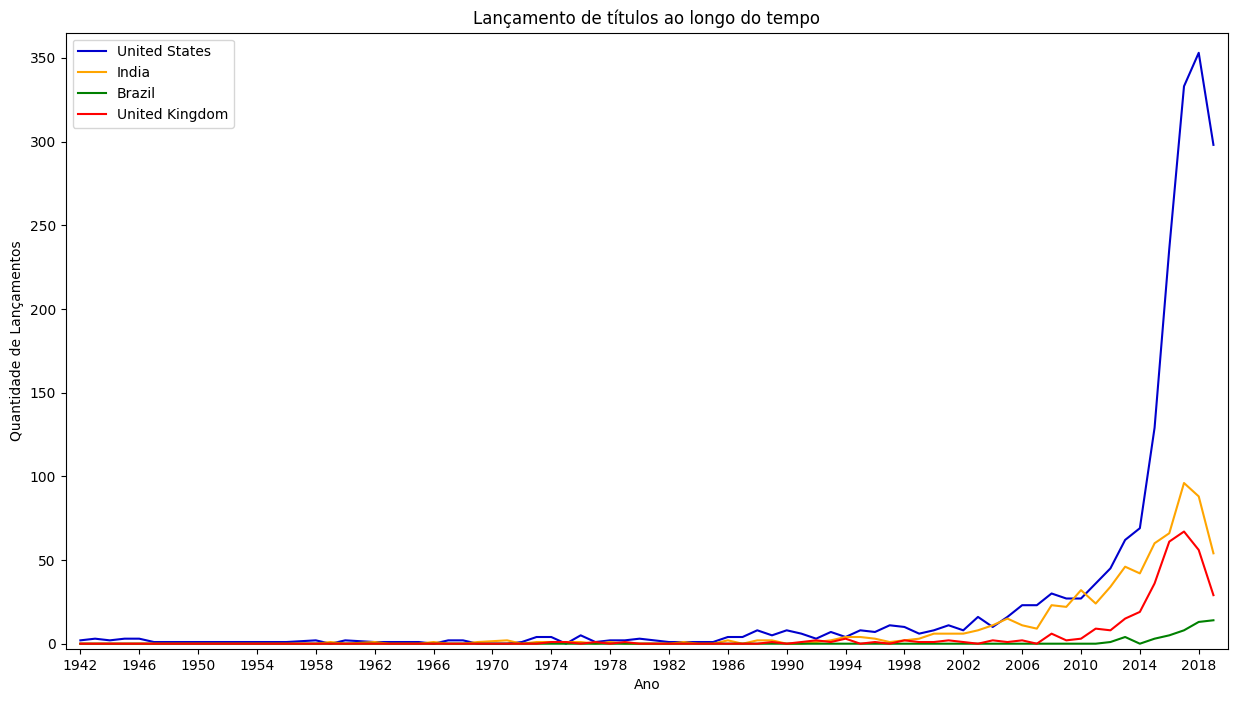

In [49]:
# Plotando o gráfico
graph_titles_per_year.plot(kind = 'line' ,title = 'Lançamento de títulos ao longo do tempo', xlabel = 'Ano', ylabel = 'Quantidade de Lançamentos', figsize=(15,8),  xticks = range(1942, 2020, 4), xlim = (1941, 2020), ylim = (-3, 365), color = ['mediumblue', 'orange', 'green', 'red'])

#### Duração

Iremos dividir os títulos em dois tipos (séries e filmes), pois eles possuem durações diferentes, um é em temporadas e o outro em minutos. Feita a divisão em duas colunas, iremos montar dois dataframes diferentes, um para cada tipo

In [50]:
duration_minutes_column = []
duration_seasons_column = []

# Montando as colunas com durações diferentes e adicionando
# a cada uma o tempo correspondente
for time in netflix_nov_df['duration']:
    if time.find('Season') == -1:
        new_time = re.sub('[ min]', '', time)
        duration_minutes_column.append(int(new_time))
        duration_seasons_column.append(None)
    else:
        new_time = re.sub('[ Season]', '', time)
        duration_minutes_column.append(None)
        duration_seasons_column.append(int(new_time))

netflix_nov_df.rename(columns={'duration':'duration_seasons'}, inplace=True)
netflix_nov_df['duration_seasons'] = duration_seasons_column
netflix_nov_df['duration_minutes'] = duration_minutes_column
netflix_nov_df

,title,director,cast,country,date_added,release_year,rating,duration_seasons,genre,type,duration_minutes
show_id,,,,,,,,,,,
81193313,Chocolate,not informed,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,14,1.0,"International TV Shows, Korean TV Shows, Roman...",0,NaN
81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,not informed,2019-11-30,2019,0,NaN,"Documentaries, International Movies",1,67.0
81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,14,NaN,"Comedies, Dramas, International Movies",1,135.0
81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,14,NaN,"Dramas, Independent Movies, International Movies",1,106.0
80213643,Chip and Potato,not informed,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaT,2019,5,2.0,Kids' TV,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,1987,-1,NaN,"Cult Movies, Horror Movies",1,84.0
70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,2009,14,NaN,Horror Movies,1,29.0
70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,2007,-1,NaN,"Dramas, International Movies",1,104.0


In [51]:
# Criando os dataframes para cada tipo (Retiramos também a data de adição para 
# evitar perder dados na separação, pois há valores nulos nas datas)
netflix_nov_series_df = netflix_nov_df.drop(columns=['duration_minutes', 'date_added'])

netflix_nov_movies_df = netflix_nov_df.drop(columns=['duration_seasons', 'date_added'])

# Retirando os valores nulos (as séries dos filmes e vice-versa)
netflix_nov_series_df.dropna(inplace=True)
netflix_nov_movies_df.dropna(inplace=True)

In [52]:
netflix_nov_movies_df

,title,director,cast,country,release_year,rating,genre,type,duration_minutes
show_id,,,,,,,,,
81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,not informed,2019,0,"Documentaries, International Movies",1,67.0
81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019,14,"Comedies, Dramas, International Movies",1,135.0
81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019,14,"Dramas, Independent Movies, International Movies",1,106.0
81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,2018,14,"Comedies, International Movies, Thrillers",1,107.0
81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,2019,17,"Dramas, Independent Movies, International Movies",1,81.0
...,...,...,...,...,...,...,...,...,...
70154110,Even the Rain,Icíar Bollaín,"Luis Tosar, Gael García Bernal, Juan Carlos Ad...","Spain, Mexico, France",2010,-1,"Dramas, International Movies",1,103.0
70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,1987,-1,"Cult Movies, Horror Movies",1,84.0
70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009,14,Horror Movies,1,29.0


In [53]:
netflix_nov_series_df

,title,director,cast,country,release_year,rating,duration_seasons,genre,type
show_id,,,,,,,,,
81193313,Chocolate,not informed,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019,14,1.0,"International TV Shows, Korean TV Shows, Roman...",0
80213643,Chip and Potato,not informed,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",2019,5,2.0,Kids' TV,0
70205672,La Reina del Sur,not informed,"Kate del Castillo, Cristina Urgel, Alberto Jim...","United States, Spain, Colombia, Mexico",2019,14,2.0,"Crime TV Shows, International TV Shows, Spanis...",0
81094391,Sugar Rush Christmas,not informed,"Hunter March, Candace Nelson, Adriano Zumbo",United States,2019,10,1.0,Reality TV,0
81152641,The Charming Stepmom,not informed,"Shahkrit Yamnarm, View Wannarot Sontichai, Kri...",not informed,2019,14,1.0,"International TV Shows, Romantic TV Shows, TV ...",0
...,...,...,...,...,...,...,...,...,...
70259177,Jack Taylor,Stuart Orme,"Iain Glen, Killian Scott, Nora-Jane Noone, Tar...","United States, Ireland",2016,17,1.0,"Crime TV Shows, International TV Shows, TV Dramas",0
70258566,DreamWorks Spooky Stories: Volume 2,not informed,"Seth Rogen, Kiefer Sutherland, Will Arnett, Hu...",not informed,2011,10,1.0,"Kids' TV, TV Comedies",0
70242630,DreamWorks Shrek's Swamp Stories,not informed,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States,2008,10,1.0,"Kids' TV, TV Action & Adventure, TV Comedies",0


Encontrando agora os títulos com as maiores e menores durações

In [54]:
# Localizando o filme com a maior duração
netflix_nov_movies_df.loc[netflix_nov_movies_df['duration_minutes'] == netflix_nov_movies_df['duration_minutes'].max()]

,title,director,cast,country,release_year,rating,genre,type,duration_minutes
show_id,,,,,,,,,
80988062,Black Mirror: Bandersnatch,not informed,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018,17,"Dramas, International Movies, Sci-Fi & Fantasy",1,312.0


In [55]:
# Localizando o filme com a menor duração
netflix_nov_movies_df.loc[netflix_nov_movies_df['duration_minutes'] == netflix_nov_movies_df['duration_minutes'].min()]

,title,director,cast,country,release_year,rating,genre,type,duration_minutes
show_id,,,,,,,,,
70304298,Silent,"Limbert Fabian, Brandon Oldenburg",not informed,United States,2014,7,"Children & Family Movies, Sci-Fi & Fantasy",1,3.0


In [56]:
# Localizando a série com a maior duração
netflix_nov_series_df.loc[netflix_nov_series_df['duration_seasons'] == netflix_nov_series_df['duration_seasons'].max()]

,title,director,cast,country,release_year,rating,duration_seasons,genre,type
show_id,,,,,,,,,
70140391,Grey's Anatomy,not informed,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2018,14,15.0,"Romantic TV Shows, TV Dramas",0
70142386,NCIS,not informed,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,2017,14,15.0,"Crime TV Shows, TV Dramas, TV Mysteries",0


In [57]:
# Localizando a série com a menor duração
netflix_nov_series_df.loc[netflix_nov_series_df['duration_seasons'] == netflix_nov_series_df['duration_seasons'].min()]

,title,director,cast,country,release_year,rating,duration_seasons,genre,type
show_id,,,,,,,,,
81193313,Chocolate,not informed,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019,14,1.0,"International TV Shows, Korean TV Shows, Roman...",0
81094391,Sugar Rush Christmas,not informed,"Hunter March, Candace Nelson, Adriano Zumbo",United States,2019,10,1.0,Reality TV,0
81152641,The Charming Stepmom,not informed,"Shahkrit Yamnarm, View Wannarot Sontichai, Kri...",not informed,2019,14,1.0,"International TV Shows, Romantic TV Shows, TV ...",0
80990849,The Movies That Made Us,not informed,not informed,United States,2019,17,1.0,Docuseries,0
80156799,Levius,not informed,"Nobunaga Shimazaki, Junichi Suwabe, Takahiro S...",Japan,2019,14,1.0,"Anime Series, International TV Shows",0
...,...,...,...,...,...,...,...,...,...
70259177,Jack Taylor,Stuart Orme,"Iain Glen, Killian Scott, Nora-Jane Noone, Tar...","United States, Ireland",2016,17,1.0,"Crime TV Shows, International TV Shows, TV Dramas",0
70258566,DreamWorks Spooky Stories: Volume 2,not informed,"Seth Rogen, Kiefer Sutherland, Will Arnett, Hu...",not informed,2011,10,1.0,"Kids' TV, TV Comedies",0
70242630,DreamWorks Shrek's Swamp Stories,not informed,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States,2008,10,1.0,"Kids' TV, TV Action & Adventure, TV Comedies",0


Com esse tratamento podemos montar um gráfico de boxplot para a duração dos filmes e das séries de Tv, visualizando a média, moda, mediana, os limites e outras informações

In [58]:
boxplot_df = netflix_nov_df[['duration_minutes', 'duration_seasons']].copy()
boxplot_df.rename(columns={'duration_minutes':'Filmes','duration_seasons':'Séries'}, inplace=True)
boxplot_df

,Filmes,Séries
show_id,,
81193313,NaN,1.0
81197050,67.0,NaN
81213894,135.0,NaN
81082007,106.0,NaN
80213643,NaN,2.0
...,...,...
70141644,84.0,NaN
70127998,29.0,NaN
70084180,104.0,NaN


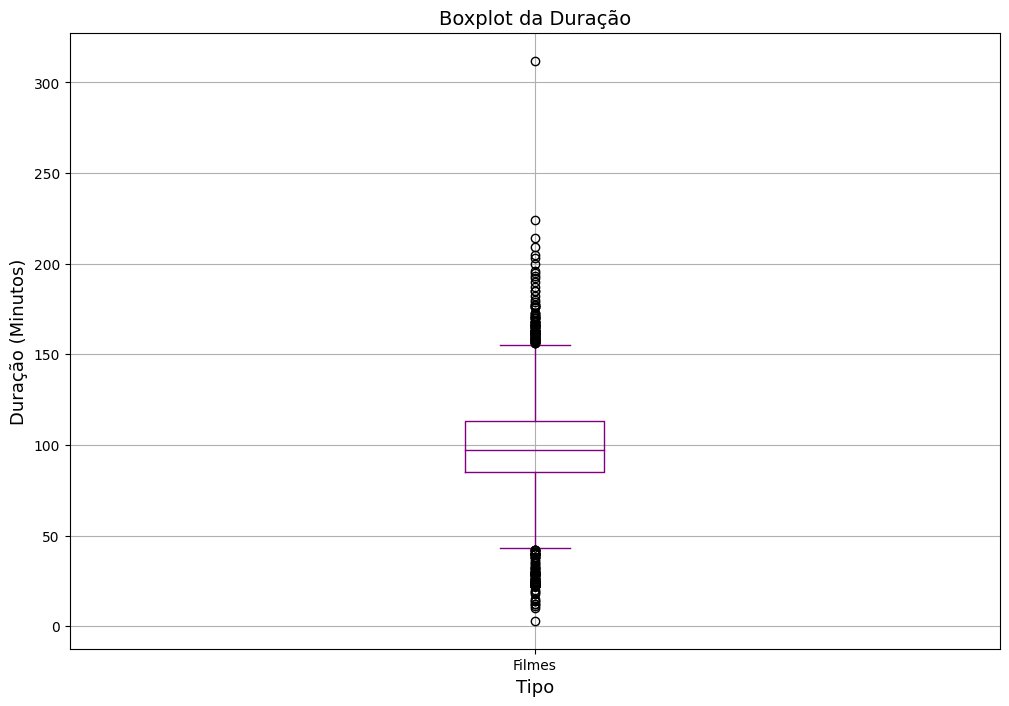

In [59]:
fig = plt.figure(figsize =(12, 8))

graph_boxplot = boxplot_df.boxplot(column = 'Filmes', color = 'purple', fontsize = 10)

plt.title('Boxplot da Duração',  fontsize=14)
plt.xlabel("Tipo",  fontsize=13)
plt.ylabel("Duração (Minutos)",  fontsize=13)
plt.show()

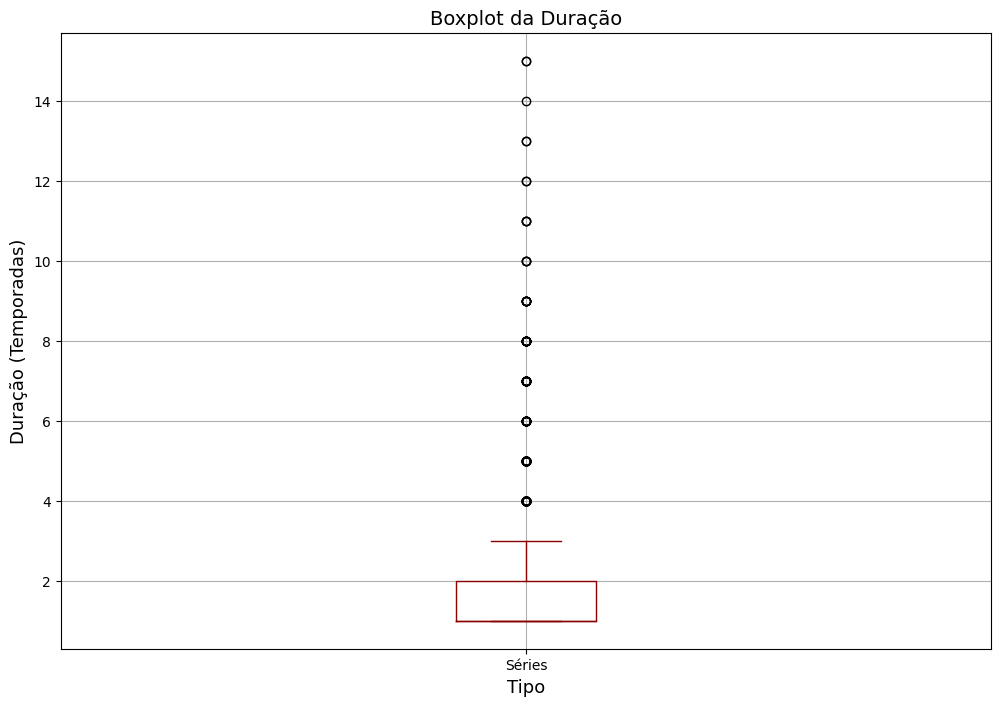

In [60]:
fig = plt.figure(figsize =(12, 8))

graph_boxplot = boxplot_df.boxplot(column = 'Séries', color = 'darkred', fontsize = 10)

plt.title('Boxplot da Duração',  fontsize=14)
plt.xlabel("Tipo",  fontsize=13)
plt.ylabel("Duração (Temporadas)",  fontsize=13)
plt.show()

#### Países

Antes de transformar os países em dados quantitativos pela função cat.codes, iremos analisar os países que mais possuem títulos no catálogo de novembro sem contabilziar as produções conjuntas

In [61]:
# Contando quantos títulos de cada país estão contidos no catálogo 
# de novembro e mostrando os 6 que mais possuem
graph_country_max = netflix_nov_df['country'].value_counts()[0:6]
graph_country_max

United States     1907
India              697
not informed       427
United Kingdom     336
Japan              168
Canada             139
Name: country, dtype: int64

In [62]:
# Retirando da contagem os países não informados
graph_country_max.drop('not informed', inplace = True)
graph_country_max

United States     1907
India              697
United Kingdom     336
Japan              168
Canada             139
Name: country, dtype: int64

<AxesSubplot: title={'center': 'Países com o maior número de títulos lançados'}, xlabel='Países', ylabel='Quantidade de Lançamentos'>

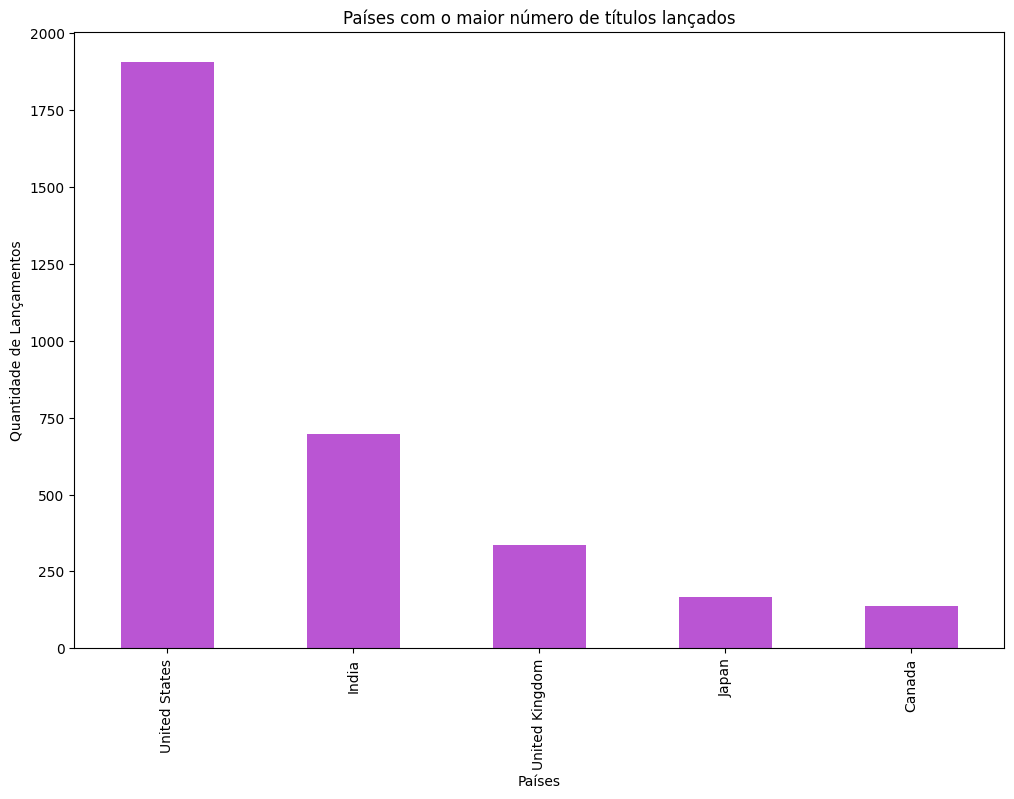

In [63]:
# Plotando o gráfico com os 5 que mais possuem títulos
graph_country_max.plot(kind = 'bar', title='Países com o maior número de títulos lançados', xlabel = 'Países', ylabel='Quantidade de Lançamentos', color = 'mediumorchid', figsize=(12,8))

Analisaremos também os que menos possuem títulos

In [64]:
# Fazendo novamente a contagem, mas com o intuito de achar
# quais os que menos possuem títulos
graph_country_min = netflix_nov_df['country'].value_counts() # talvez usar loc ou iloc
graph_country_min

United States                                           1907
India                                                    697
not informed                                             427
United Kingdom                                           336
Japan                                                    168
                                                        ... 
Norway, Denmark, Netherlands, Sweden                       1
Ireland, United Kingdom, Greece, France, Netherlands       1
Israel, Germany                                            1
Canada, Germany, France, United States                     1
Spain, Mexico, France                                      1
Name: country, Length: 528, dtype: int64

In [65]:
# Retirando os países compostos da contagem
for country in graph_country_min.index:
    if country.find(',') != -1:
        graph_country_min.drop(country, inplace = True)

graph_country_min

United States         1907
India                  697
not informed           427
United Kingdom         336
Japan                  168
                      ... 
Dominican Republic       1
Finland                  1
Cambodia                 1
Croatia                  1
Bangladesh               1
Name: country, Length: 62, dtype: int64

In [66]:
# Mostrando quais foram que menos possuem títulos
graph_country_min.tail()

Dominican Republic    1
Finland               1
Cambodia              1
Croatia               1
Bangladesh            1
Name: country, dtype: int64

In [67]:
# Como temos mais que esses com apenas 1 título
graph_country_min.loc[graph_country_min.values == 1]

Venezuela             1
Saudi Arabia          1
Guatemala             1
Bulgaria              1
Georgia               1
West Germany          1
Dominican Republic    1
Finland               1
Cambodia              1
Croatia               1
Bangladesh            1
Name: country, dtype: int64

Transformando o dados dos países em quantitativos. Para isso utilizaremos uma função do pandas (cat.codes) que atribui valores automáticos. Entretanto, devemos mudar o tipo do dado para categórico antes de aplicar a função

In [68]:
# Como esse é o último dado que transformaremos, iremos criar um novo df
# para realizar a correlação que será separada para as séries, filmes e geral
netflix_corr_df = netflix_nov_df.copy()
netflix_nov_series_corr_df = netflix_nov_series_df.copy()
netflix_nov_movies_corr_df = netflix_nov_movies_df.copy()

In [69]:
# Mudando o tipo do dado da coluna país
netflix_corr_df['country'] = netflix_corr_df['country'].astype('category')

In [70]:
netflix_corr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5837 entries, 81193313 to 70053412
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             5837 non-null   object        
 1   director          5837 non-null   object        
 2   cast              5837 non-null   object        
 3   country           5837 non-null   category      
 4   date_added        5195 non-null   datetime64[ns]
 5   release_year      5837 non-null   int64         
 6   rating            5837 non-null   int64         
 7   duration_seasons  1898 non-null   float64       
 8   genre             5837 non-null   object        
 9   type              5837 non-null   int64         
 10  duration_minutes  3939 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 533.3+ KB


In [71]:
# Transformando em quantitativo
netflix_corr_df['country'] = netflix_corr_df['country'].cat.codes
netflix_corr_df

,title,director,cast,country,date_added,release_year,rating,duration_seasons,genre,type,duration_minutes
show_id,,,,,,,,,,,
81193313,Chocolate,not informed,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",314,2019-11-30,2019,14,1.0,"International TV Shows, Korean TV Shows, Roman...",0,NaN
81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,527,2019-11-30,2019,0,NaN,"Documentaries, International Movies",1,67.0
81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",186,2019-11-30,2019,14,NaN,"Comedies, Dramas, International Movies",1,135.0
81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...",148,2019-11-29,2019,14,NaN,"Dramas, Independent Movies, International Movies",1,106.0
80213643,Chip and Potato,not informed,"Abigail Oliver, Andrea Libman, Briana Buckmast...",65,NaT,2019,5,2.0,Kids' TV,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",426,2010-11-01,1987,-1,NaN,"Cult Movies, Horror Movies",1,84.0
70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",426,2009-11-18,2009,14,NaN,Horror Movies,1,29.0
70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",104,2009-05-05,2007,-1,NaN,"Dramas, International Movies",1,104.0


In [72]:
netflix_corr_df['country'].value_counts()

426    1907
186     697
527     427
364     336
239     168
       ... 
268       1
215       1
220       1
53        1
332       1
Name: country, Length: 528, dtype: int64

In [73]:
# Realizando o mesmo para os dataframes das séries e filmes
netflix_nov_series_corr_df['country'] = netflix_nov_series_corr_df['country'].astype('category')
netflix_nov_movies_corr_df['country'] = netflix_nov_movies_corr_df['country'].astype('category')

netflix_nov_series_corr_df['country'] = netflix_nov_series_corr_df['country'].cat.codes
netflix_nov_movies_corr_df['country'] = netflix_nov_movies_corr_df['country'].cat.codes

### Correlação entre as variáveis

Fórmula de correlação: cor(i,j) = cov(i,j)/[stdev(i)*stdev(j)]

Como nem todos os dados são quantitativos e possuiriam pouca correlação se transformassemos, iremos trabalhar apenas com as colunas:
- País
- Ano de lançamento
- Classificação
- Duração
- Tipo

In [74]:
netflix_corr_df.head()

,title,director,cast,country,date_added,release_year,rating,duration_seasons,genre,type,duration_minutes
show_id,,,,,,,,,,,
81193313,Chocolate,not informed,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",314,2019-11-30,2019,14,1.0,"International TV Shows, Korean TV Shows, Roman...",0,NaN
81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,527,2019-11-30,2019,0,NaN,"Documentaries, International Movies",1,67.0
81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",186,2019-11-30,2019,14,NaN,"Comedies, Dramas, International Movies",1,135.0
81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...",148,2019-11-29,2019,14,NaN,"Dramas, Independent Movies, International Movies",1,106.0
80213643,Chip and Potato,not informed,"Abigail Oliver, Andrea Libman, Briana Buckmast...",65,NaT,2019,5,2.0,Kids' TV,0,NaN


In [75]:
netflix_corr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5837 entries, 81193313 to 70053412
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             5837 non-null   object        
 1   director          5837 non-null   object        
 2   cast              5837 non-null   object        
 3   country           5837 non-null   int16         
 4   date_added        5195 non-null   datetime64[ns]
 5   release_year      5837 non-null   int64         
 6   rating            5837 non-null   int64         
 7   duration_seasons  1898 non-null   float64       
 8   genre             5837 non-null   object        
 9   type              5837 non-null   int64         
 10  duration_minutes  3939 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int16(1), int64(3), object(4)
memory usage: 513.0+ KB


<AxesSubplot: >

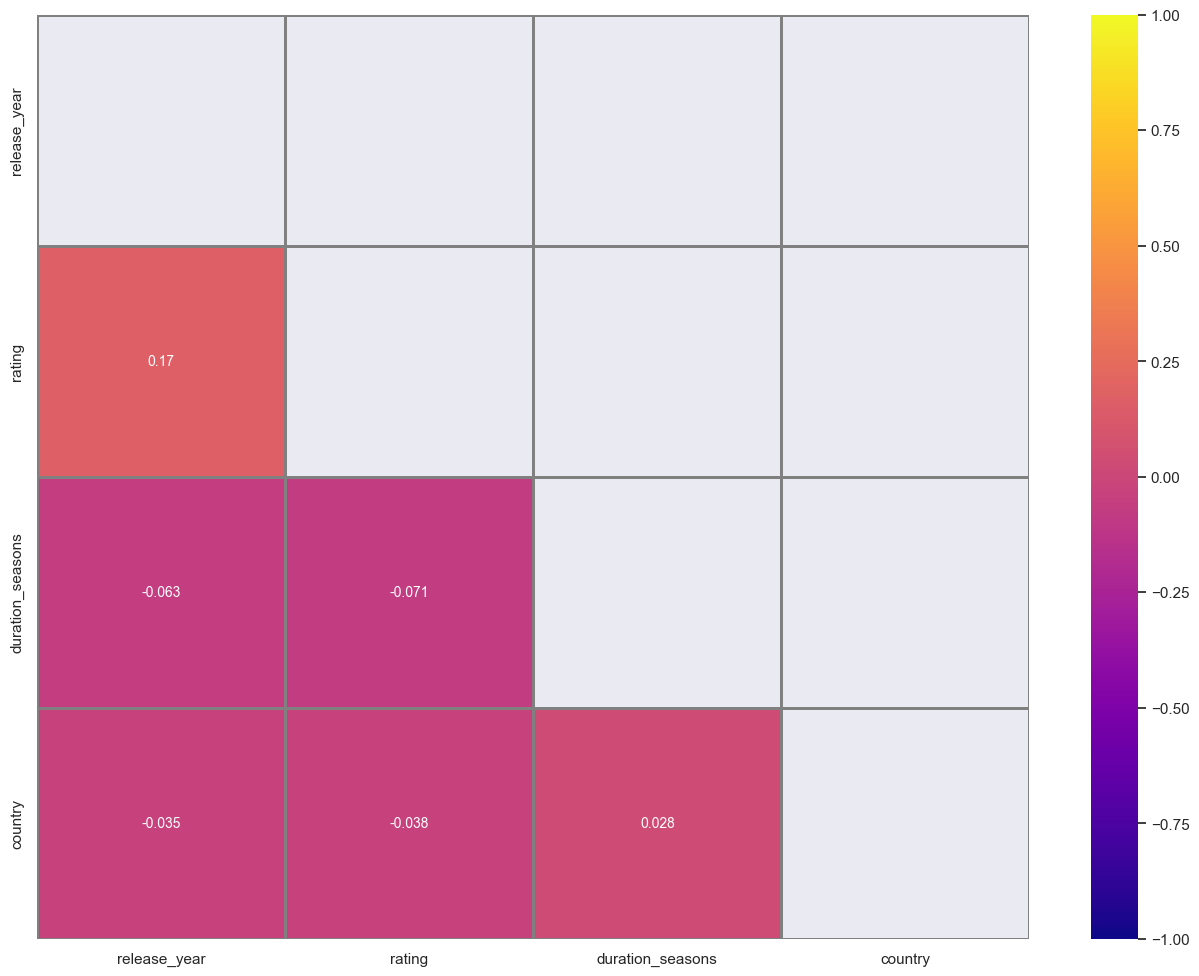

In [76]:
# Gráfico de correlação com as séries

corr_series = netflix_nov_series_corr_df[['release_year','rating','duration_seasons', 'country']].corr(method='pearson')

np.triu ( np.ones ( corr_series.shape , dtype  =  bool ))
mask  =  np.triu ( np.ones ( corr_series.shape , dtype  =  bool ))
fig = plt.gcf()
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 2.5)
sns.set(font_scale=1)
sns.heatmap(corr_series,annot=True, mask  =  mask , annot_kws={"size": 10} ,cmap="plasma", linecolor='gray', linewidths=2, vmin=-1, vmax=1)

<AxesSubplot: >

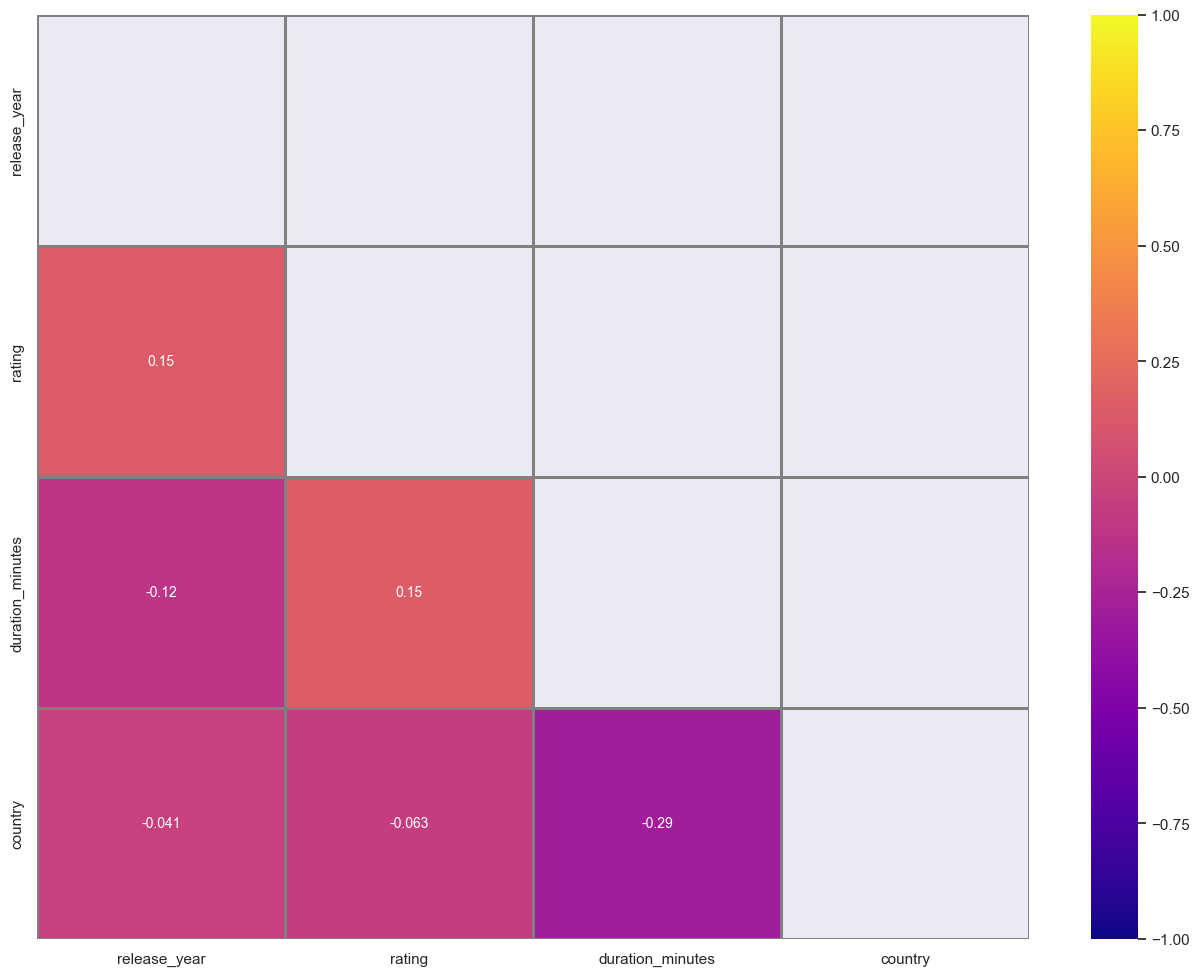

In [77]:
# Gráfico de correlação com os filmes

corr_movies = netflix_nov_movies_corr_df[['release_year','rating', 'duration_minutes', 'country']].corr(method='pearson', numeric_only = True)

np.triu ( np.ones ( corr_movies.shape , dtype  =  bool ))
mask  =  np.triu ( np.ones ( corr_movies.shape , dtype  =  bool ))
fig = plt.gcf()
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 2.5)
sns.set(font_scale=1)
sns.heatmap(corr_movies,annot=True, mask  =  mask , annot_kws={"size": 10} ,cmap="plasma", linecolor='gray', linewidths=2, vmin=-1, vmax=1)

<AxesSubplot: >

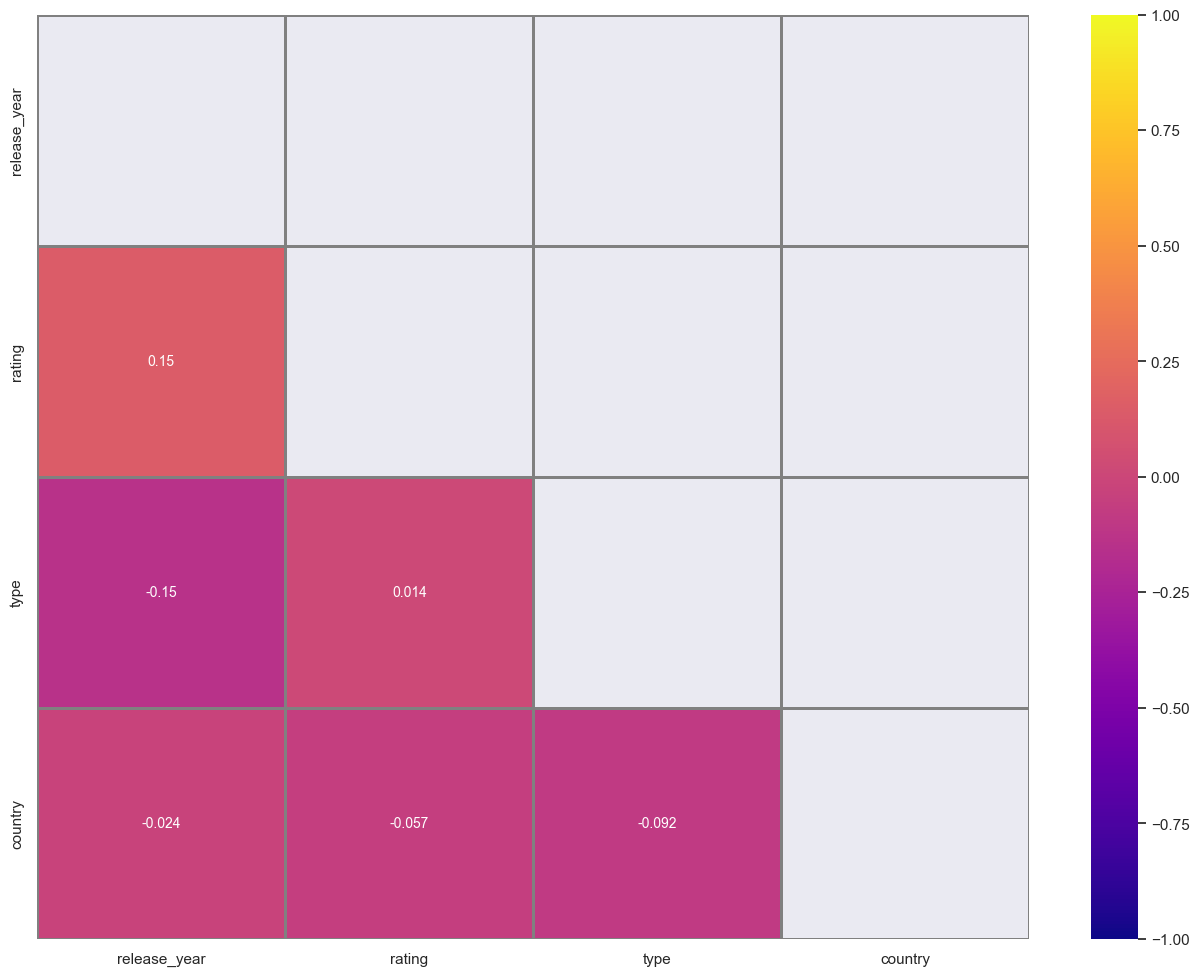

In [78]:
# Gráfico de correlação com os dados gerais

corr_df = netflix_corr_df[['release_year','rating','type', 'country']].corr(method='pearson', numeric_only = True)

np.triu ( np.ones ( corr_df.shape , dtype  =  bool ))
mask  =  np.triu ( np.ones ( corr_df.shape , dtype  =  bool ))
fig = plt.gcf()
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 2.5)
sns.set(font_scale=1)
sns.heatmap(corr_df,annot=True, mask  =  mask , annot_kws={"size": 10} ,cmap="plasma", linecolor='gray', linewidths=2, vmin=-1, vmax=1)

## Extraindo Outras Informações

### Títulos com a maior duração em três países

Países escolhidos para realizar a análise:

- India
- Reino Unido
- Brasil

A ideia geral é apenas buscar nos dataframes que criamos as informações

#### Filmes

In [79]:
# India

maxduration_movie_india = netflix_nov_movies_df.loc[netflix_nov_movies_df['country'] == 'India']
maxduration_movie_india.loc[maxduration_movie_india['duration_minutes'] == maxduration_movie_india['duration_minutes'].max()]

,title,director,cast,country,release_year,rating,genre,type,duration_minutes
show_id,,,,,,,,,
60020906,Lagaan,Ashutosh Gowariker,"Aamir Khan, Gracy Singh, Rachel Shelley, Paul ...",India,2001,10,"Dramas, International Movies, Music & Musicals",1,224.0


In [80]:
# Reino Unido

maxduration_movie_united_kingdom = netflix_nov_movies_df.loc[netflix_nov_movies_df['country'] == 'United Kingdom']
maxduration_movie_united_kingdom.loc[maxduration_movie_united_kingdom['duration_minutes'] == maxduration_movie_united_kingdom['duration_minutes'].max()]

,title,director,cast,country,release_year,rating,genre,type,duration_minutes
show_id,,,,,,,,,
70298389,Tim Minchin And The Heritage Orchestra Live,Matt Askem,"Tim Minchin, Jules Buckley",United Kingdom,2011,17,"Music & Musicals, Stand-Up Comedy",1,146.0


In [81]:
# Brasil

maxduration_movie_brazil = netflix_nov_movies_df.loc[netflix_nov_movies_df['country'] == 'Brazil']
maxduration_movie_brazil.loc[maxduration_movie_brazil['duration_minutes'] == maxduration_movie_brazil['duration_minutes'].max()]

,title,director,cast,country,release_year,rating,genre,type,duration_minutes
show_id,,,,,,,,,
80186829,Nothing to Lose,Alexandre Avancini,"Petrônio Gontijo, Day Mesquita, Beth Goulart, ...",Brazil,2018,10,"Dramas, Faith & Spirituality, International Mo...",1,133.0


#### Séries de TV

In [82]:
# India

maxduration_serie_india = netflix_nov_series_df.loc[netflix_nov_series_df['country'] == 'India']
maxduration_serie_india.loc[maxduration_serie_india['duration_seasons'] == maxduration_serie_india['duration_seasons'].max()]

,title,director,cast,country,release_year,rating,duration_seasons,genre,type
show_id,,,,,,,,,
80207879,Sab Jholmaal Hai,Vijay Roche,not informed,India,2017,0,4.0,"Kids' TV, TV Comedies",0


In [83]:
# Reino Unido

maxduration_serie_united_kingdom = netflix_nov_series_df.loc[netflix_nov_series_df['country'] == 'United Kingdom']
maxduration_serie_united_kingdom.loc[maxduration_serie_united_kingdom['duration_seasons'] == maxduration_serie_united_kingdom['duration_seasons'].max()]

,title,director,cast,country,release_year,rating,duration_seasons,genre,type
show_id,,,,,,,,,
80244567,Dad's Army,not informed,"Arthur Lowe, John Le Mesurier, Clive Dunn, Joh...",United Kingdom,1977,10,10.0,"British TV Shows, Classic & Cult TV, TV Comedies",0
70177040,Danger Mouse: Classic Collection,not informed,"David Jason, Terry Scott, Edward Kelsey, Brian...",United Kingdom,1992,5,10.0,"British TV Shows, Kids' TV, TV Comedies",0


In [84]:
# Brasil

maxduration_serie_brazil = netflix_nov_series_df.loc[netflix_nov_series_df['country'] == 'Brazil']
maxduration_serie_brazil.loc[maxduration_serie_brazil['duration_seasons'] == maxduration_serie_brazil['duration_seasons'].max()]

,title,director,cast,country,release_year,rating,duration_seasons,genre,type
show_id,,,,,,,,,
80074220,3%,not informed,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2019,17,3.0,"International TV Shows, TV Dramas, TV Sci-Fi &...",0


### Títulos com a menor duração e a relação com o diretor

A ideia geral é apenas buscar nos dataframes que criamos as informações, verificando os diretores e suas produções (se há algum padrão)

#### Filmes

In [85]:
netflix_nov_movies_df['duration_minutes'].sort_values()[0:5]

show_id
70304298     3.0
81176188    10.0
81020543    11.0
80114804    12.0
80239831    12.0
Name: duration_minutes, dtype: float64

Verificando três títulos da lista e os diretores, se há informação faltando ou se foi dirigido por mais de uma pessoa então não analisamos

In [86]:
list_min_duration_movies = netflix_nov_movies_df['duration_minutes'].sort_values()[0:5].index

In [87]:
netflix_nov_df.loc[netflix_nov_df.index == list_min_duration_movies[0]]

,title,director,cast,country,date_added,release_year,rating,duration_seasons,genre,type,duration_minutes
show_id,,,,,,,,,,,
70304298,Silent,"Limbert Fabian, Brandon Oldenburg",not informed,United States,2019-06-04,2014,7,NaN,"Children & Family Movies, Sci-Fi & Fantasy",1,3.0


In [88]:
netflix_nov_df.loc[netflix_nov_df.index == list_min_duration_movies[2]]

,title,director,cast,country,date_added,release_year,rating,duration_seasons,genre,type,duration_minutes
show_id,,,,,,,,,,,
81020543,Calico Critters: A Town of Dreams,Momoko Kamiya,not informed,not informed,2018-11-01,2017,5,NaN,Children & Family Movies,1,11.0


In [89]:
netflix_nov_df.loc[netflix_nov_df['director'] == 'Momoko Kamiya']

,title,director,cast,country,date_added,release_year,rating,duration_seasons,genre,type,duration_minutes
show_id,,,,,,,,,,,
81020543,Calico Critters: A Town of Dreams,Momoko Kamiya,not informed,not informed,2018-11-01,2017,5,NaN,Children & Family Movies,1,11.0
81020544,Calico Critters: The Treasure of Calico Village,Momoko Kamiya,not informed,not informed,2018-11-01,2017,5,NaN,Children & Family Movies,1,22.0


In [90]:
netflix_nov_df.loc[netflix_nov_df.index == list_min_duration_movies[4]]

,title,director,cast,country,date_added,release_year,rating,duration_seasons,genre,type,duration_minutes
show_id,,,,,,,,,,,
80239831,Zion,Floyd Russ,Zion Clark,United States,2018-08-10,2018,10,NaN,"Documentaries, Sports Movies",1,12.0


In [91]:
netflix_nov_df.loc[netflix_nov_df['director'] == 'Floyd Russ']

,title,director,cast,country,date_added,release_year,rating,duration_seasons,genre,type,duration_minutes
show_id,,,,,,,,,,,
80239831,Zion,Floyd Russ,Zion Clark,United States,2018-08-10,2018,10,NaN,"Documentaries, Sports Movies",1,12.0


#### Séries

Aplicando a mesma ideia para as séries de TV

In [92]:
netflix_nov_series_df['duration_seasons'].sort_values()[0:5]

show_id
81193313    1.0
80237428    1.0
80175352    1.0
80218962    1.0
80239864    1.0
Name: duration_seasons, dtype: float64

In [93]:
list_min_duration_series = netflix_nov_series_df['duration_seasons'].sort_values()[0:5].index

In [94]:
netflix_nov_df.loc[netflix_nov_df.index == list_min_duration_series[0]]

,title,director,cast,country,date_added,release_year,rating,duration_seasons,genre,type,duration_minutes
show_id,,,,,,,,,,,
81193313,Chocolate,not informed,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,14,1.0,"International TV Shows, Korean TV Shows, Roman...",0,NaN


In [95]:
netflix_nov_df.loc[netflix_nov_df.index == list_min_duration_series[2]]

,title,director,cast,country,date_added,release_year,rating,duration_seasons,genre,type,duration_minutes
show_id,,,,,,,,,,,
80175352,Troy,not informed,"Louis Hunter, Bella Dayne, Frances O'Connor, D...","United Kingdom, South Africa, Australia, Unite...",2018-04-06,2018,17,1.0,"British TV Shows, International TV Shows, Roma...",0,NaN


In [96]:
netflix_nov_df.loc[netflix_nov_df.index == list_min_duration_series[4]]

,title,director,cast,country,date_added,release_year,rating,duration_seasons,genre,type,duration_minutes
show_id,,,,,,,,,,,
80239864,"O-Negative, Love Can’t Be Designed",not informed,"Jirayu La-ongmanee, Thanapob Leeratanakajorn, ...",not informed,2018-04-13,2016,17,1.0,"International TV Shows, Romantic TV Shows, TV ...",0,NaN
